# Ensemble Techniques Project

Objective is to build a model to identify potential customers who are more likely to subscribe term deposit.

#### Importing libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

#### Univariate analysis:

In [2]:
bankdata = pd.read_csv('bank-full.csv')

In [3]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bankdata.shape

(45211, 17)

In [7]:
bankdata.isnull().sum().sum()

0

In [8]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<AxesSubplot:xlabel='age', ylabel='count'>

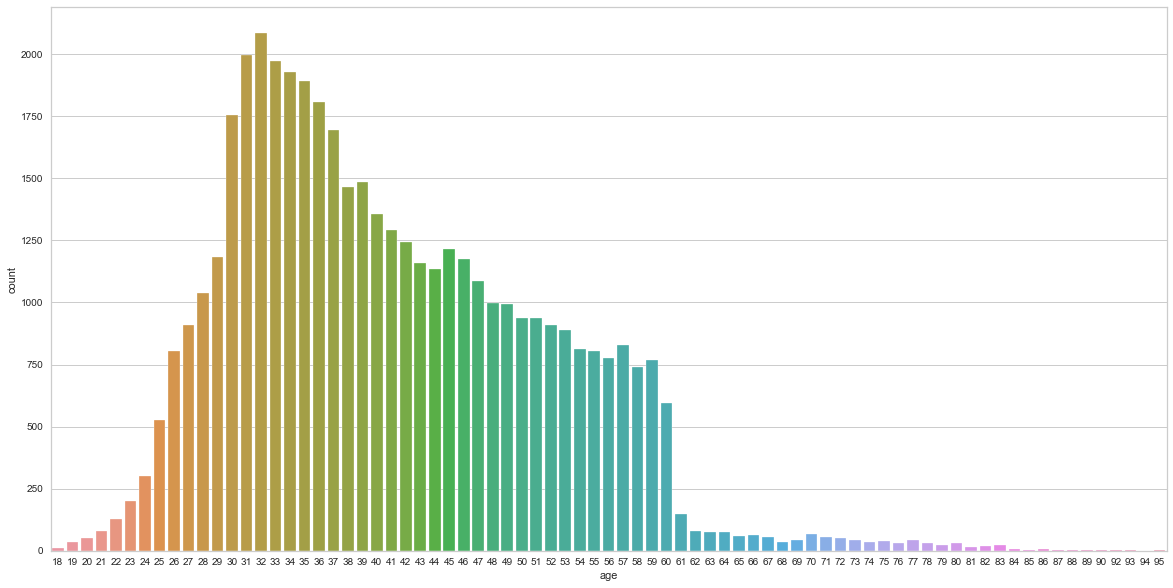

In [9]:
plt.figure(figsize = (20, 10))
sns.countplot(bankdata['age'])

<AxesSubplot:xlabel='balance', ylabel='count'>

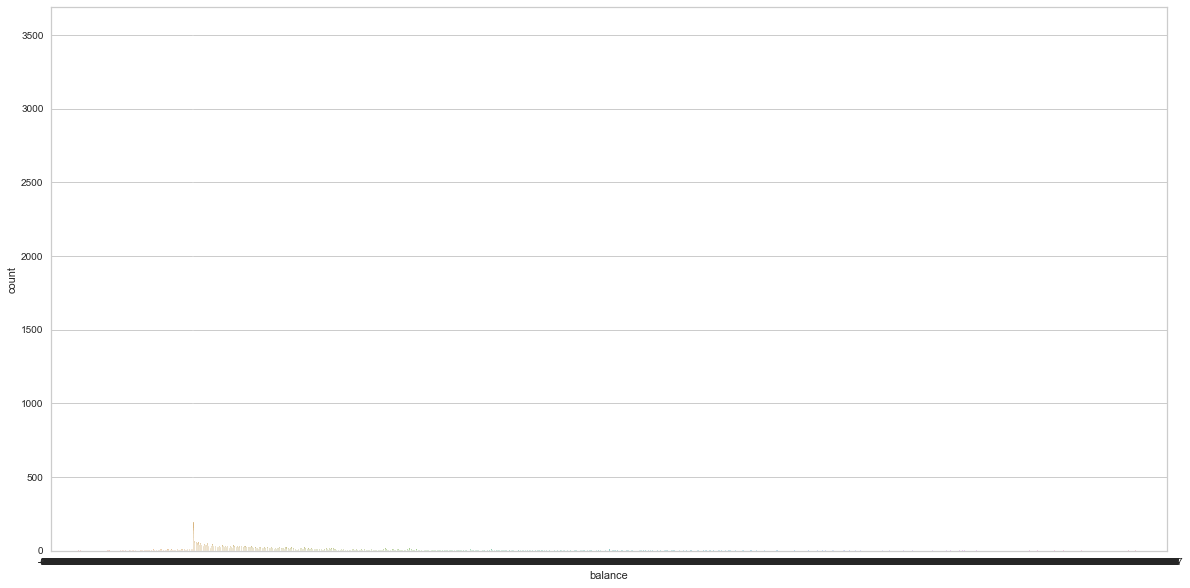

In [10]:
plt.figure(figsize = (20, 10))
sns.countplot(bankdata['balance'])

<AxesSubplot:xlabel='day', ylabel='count'>

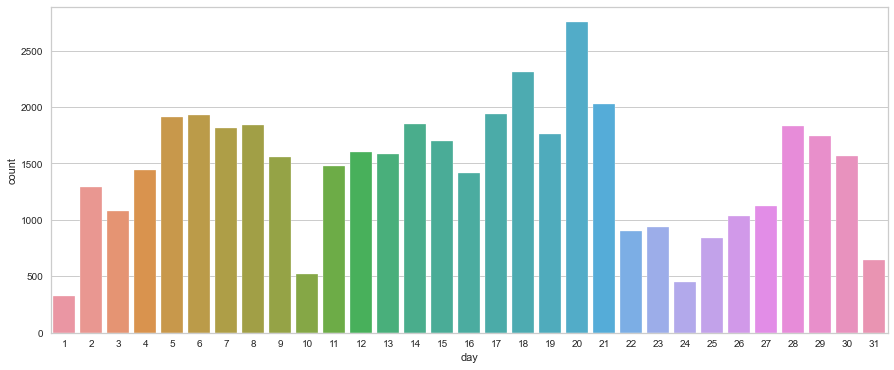

In [11]:
plt.figure(figsize = (15, 6))
sns.countplot(bankdata['day'])

<AxesSubplot:xlabel='duration', ylabel='count'>

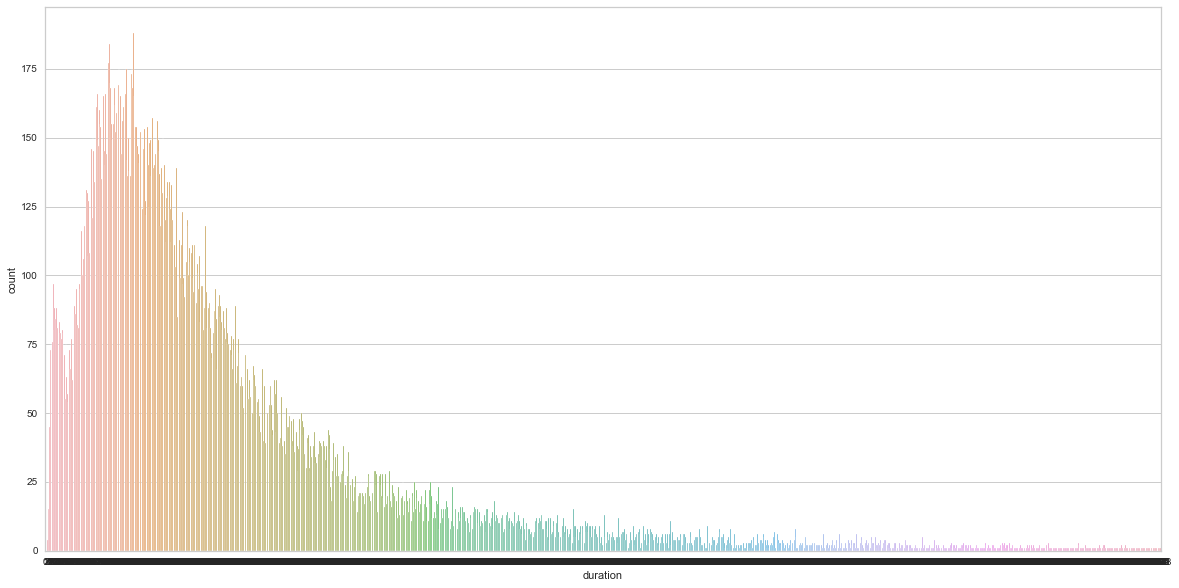

In [12]:
plt.figure(figsize = (20, 10))
sns.countplot(bankdata['duration'])

<AxesSubplot:xlabel='campaign', ylabel='count'>

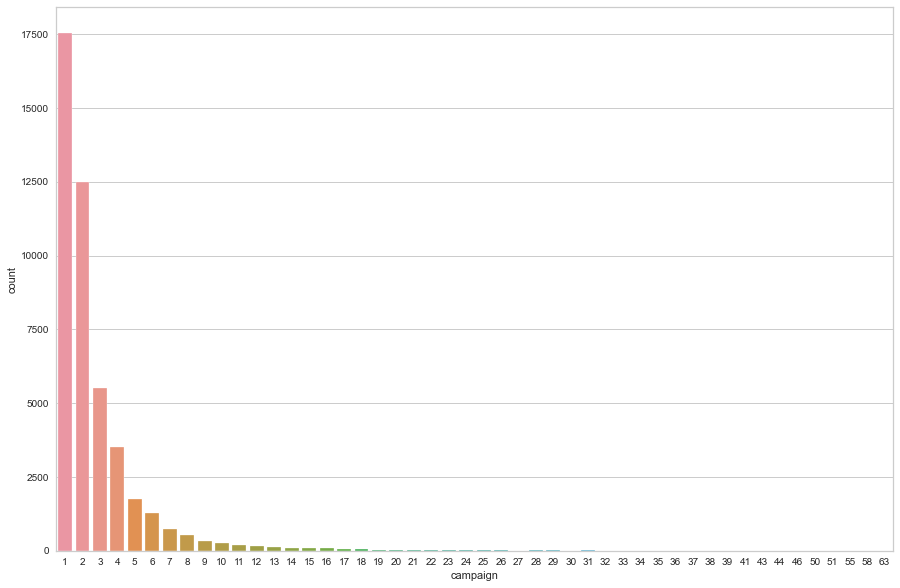

In [13]:
plt.figure(figsize = (15, 10))
sns.countplot(bankdata['campaign'])

<AxesSubplot:xlabel='pdays', ylabel='count'>

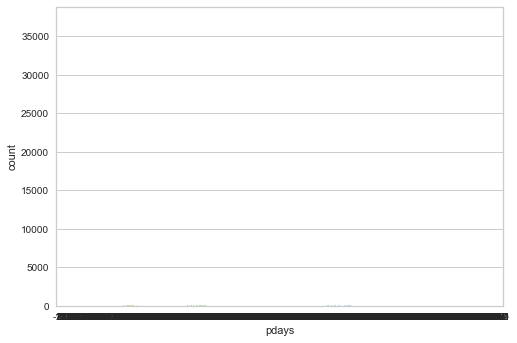

In [14]:
sns.countplot(bankdata['pdays'])

<AxesSubplot:xlabel='previous', ylabel='count'>

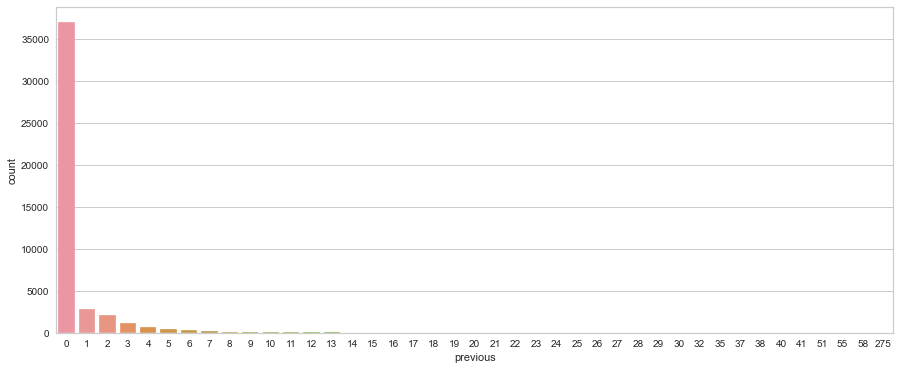

In [15]:
plt.figure(figsize = (15, 6))
sns.countplot(bankdata['previous'])

<AxesSubplot:xlabel='Target', ylabel='count'>

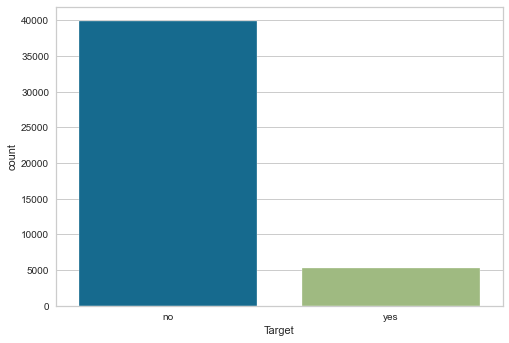

In [16]:
sns.countplot(bankdata['Target'])

<AxesSubplot:xlabel='age'>

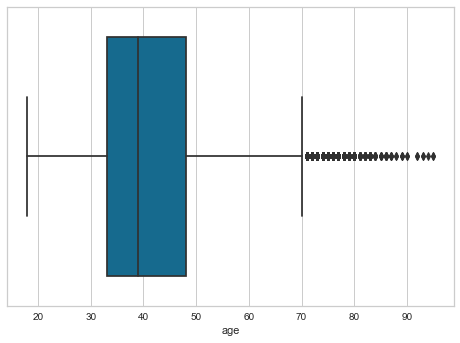

In [17]:
sns.boxplot(bankdata['age'])

<AxesSubplot:xlabel='balance'>

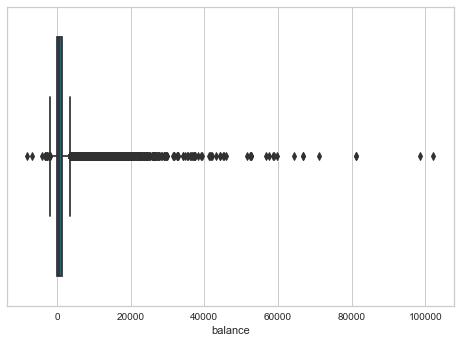

In [18]:
sns.boxplot(bankdata['balance'])

<AxesSubplot:xlabel='day'>

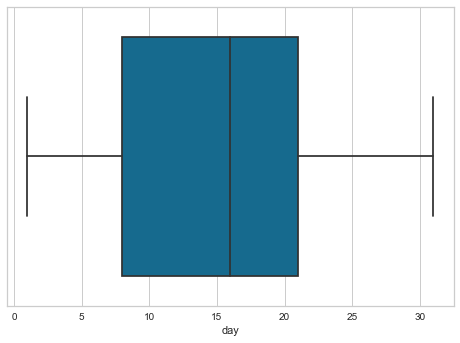

In [19]:
sns.boxplot(bankdata['day'])

<AxesSubplot:xlabel='campaign'>

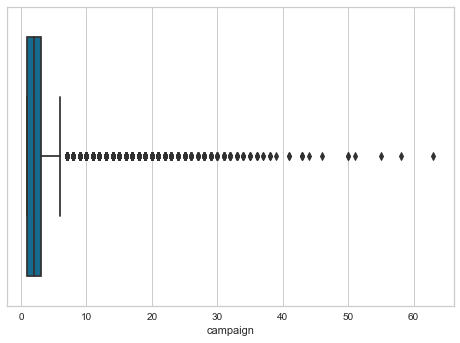

In [20]:
sns.boxplot(bankdata['campaign'])

<AxesSubplot:xlabel='duration'>

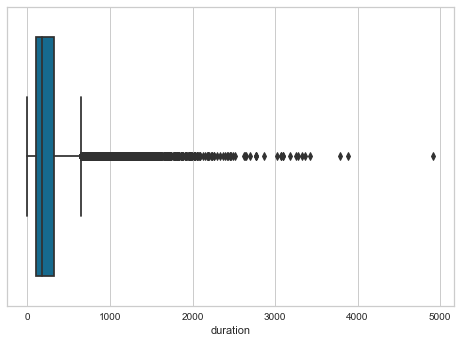

In [21]:
sns.boxplot(bankdata['duration'])

<AxesSubplot:xlabel='pdays'>

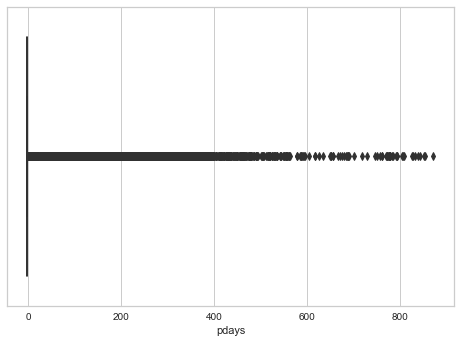

In [22]:
sns.boxplot(bankdata['pdays'])

<AxesSubplot:xlabel='previous'>

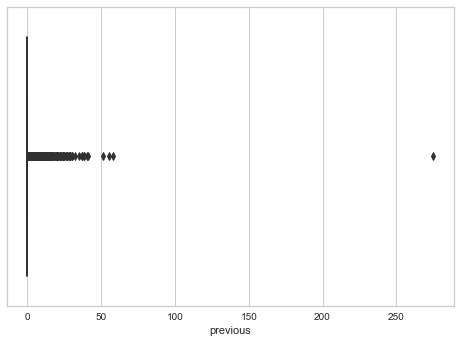

In [23]:
sns.boxplot(bankdata['previous'])

#### It looks like all numerical variables have outliers with exception of the last contact day of the month. Additionally, all numerical variables appear to be right skewed except for the last contact day of the month once again.

#### Bivariate analysis:

<AxesSubplot:>

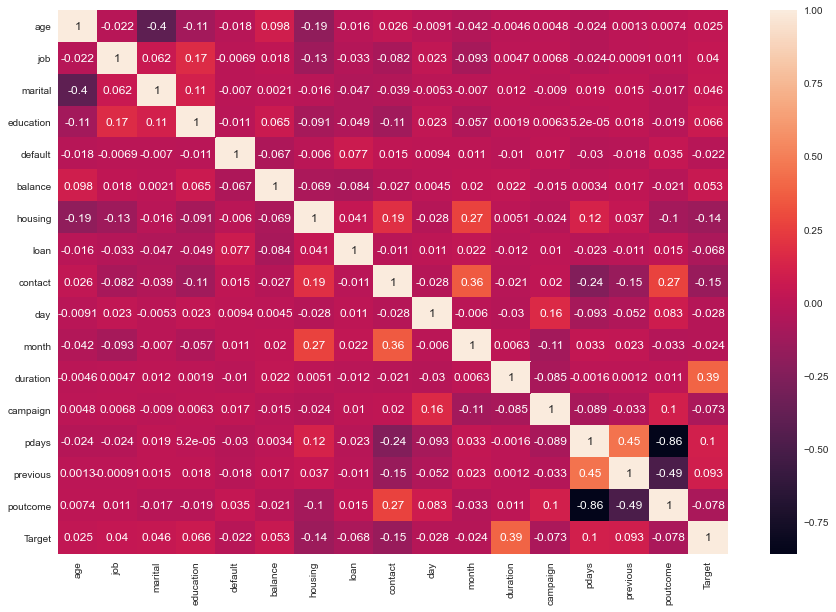

In [24]:
enc = LabelEncoder()
for cols in bankdata.columns: 
    if bankdata[cols].dtype != 'int':
        bankdata[cols] = enc.fit_transform(bankdata[cols]).astype(int)
plt.figure(figsize = (15, 10))
bankcorr = bankdata.corr()
sns.heatmap(bankcorr, annot = True)

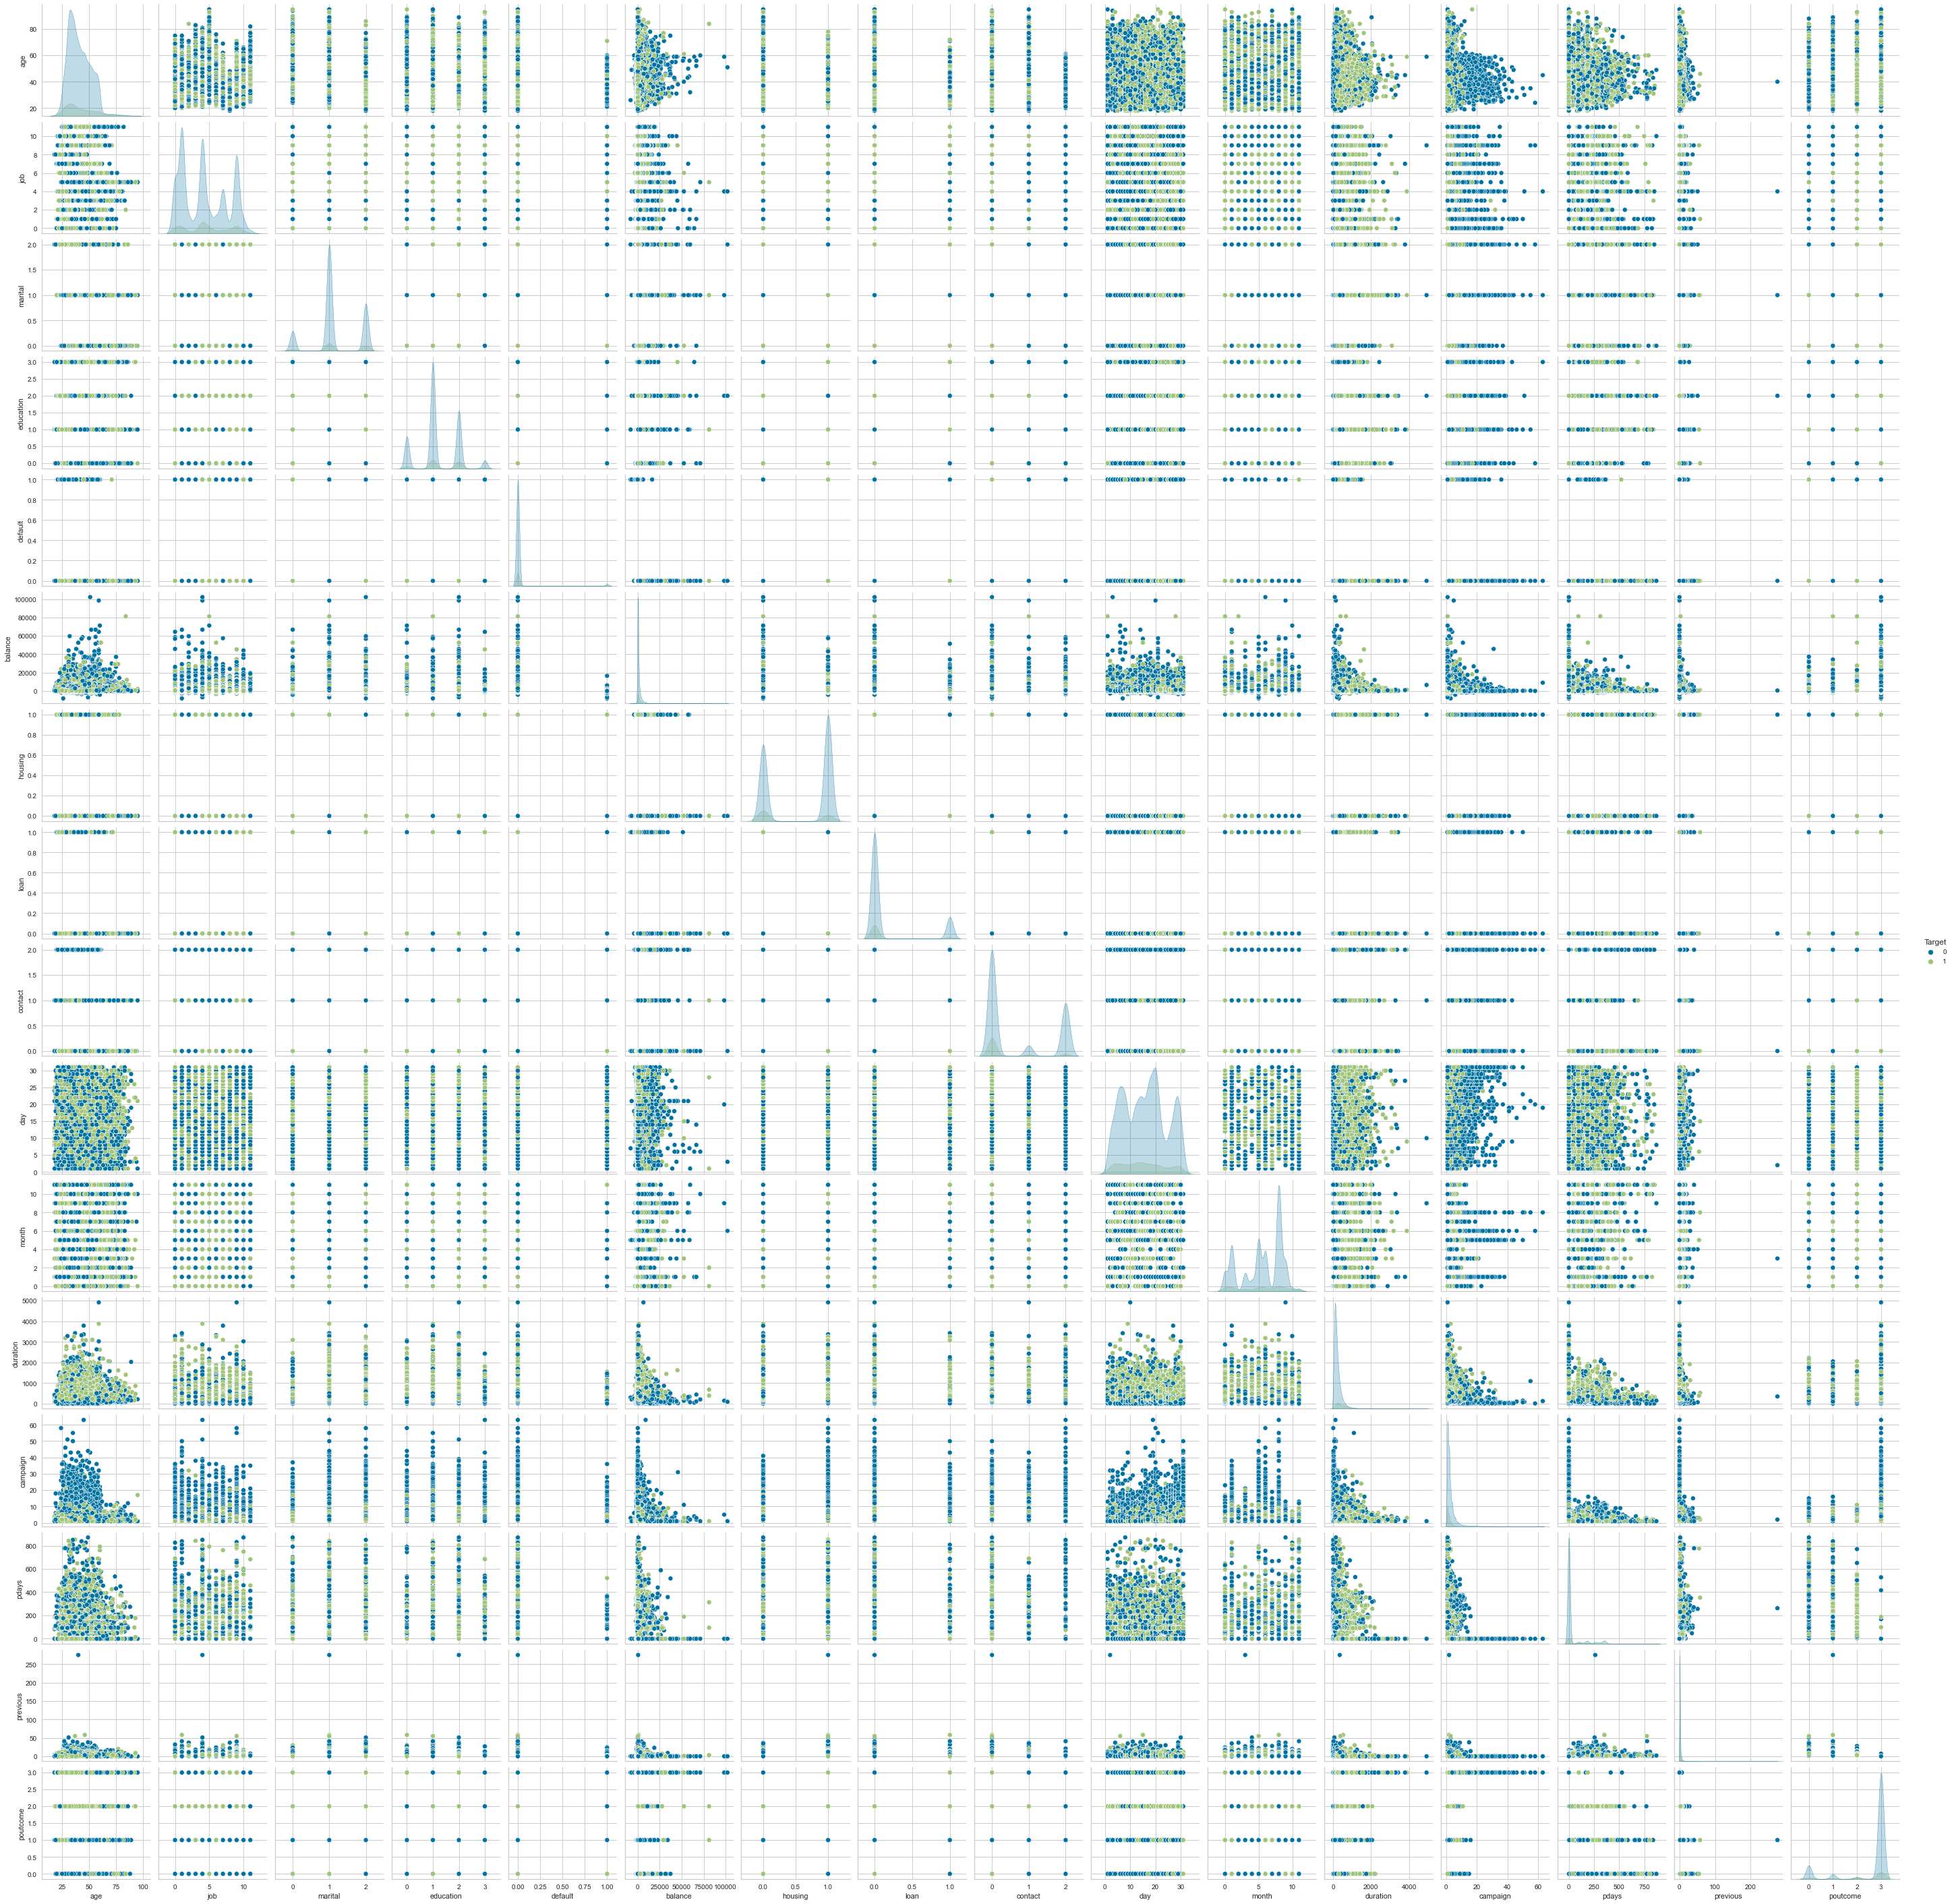

In [25]:
sns.pairplot(bankdata, hue = 'Target')

#### Out of all the predictor variables, last contact duration has the highest correlation with the target variable. 

#### Preparing the data:

In [26]:
for feature in bankdata.columns: 
    if bankdata[feature].dtype == 'object': 
        bankdata[feature] = pd.Categorical(bankdata[feature])

In [27]:
bankdata1 = bankdata[bankdata.age != 'unknown']
bankdata2 = bankdata1[bankdata1.balance != 'unknown']
bankdata3 = bankdata2[bankdata2.day != 'unknown']
bankdata4 = bankdata3[bankdata3.duration != 'unknown']
bankdata5 = bankdata4[bankdata4.campaign != 'unknown']
bankdata6 = bankdata5[bankdata5.pdays != 'unknown']
bankdata7 = bankdata6[bankdata6.previous != 'unknown']
bankdata8 = bankdata7[bankdata7.Target != 'unknown']
bkdata1 = bankdata8[bankdata8.age != 'other']
bkdata2 = bkdata1[bkdata1.balance != 'other']
bkdata3 = bkdata2[bkdata2.day != 'other']
bkdata4 = bkdata3[bkdata3.duration != 'other']
bkdata5 = bkdata4[bkdata4.campaign != 'other']
bkdata6 = bkdata5[bkdata5.pdays != 'other']
bkdata7 = bkdata6[bkdata6.previous != 'other']
bkdata = bkdata7[bkdata7.Target != 'other']

In [28]:
features = [col for col in bkdata.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(bkdata[features], bkdata['Target'], test_size=.3, random_state=1)
X_train.shape, X_test.shape

((31647, 16), (13564, 16))

#### Creating logistic regression model:

In [29]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8910350928929519


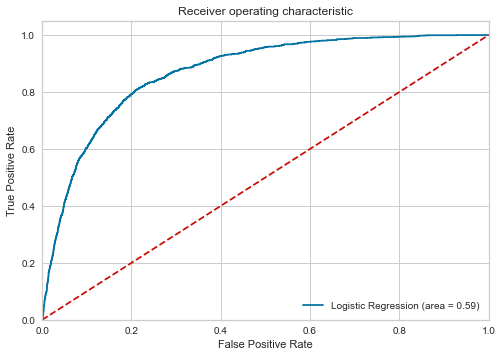

In [30]:
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
print('\n{}'.format(classification_report(y_test, model.predict(X_test))))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



<AxesSubplot:>

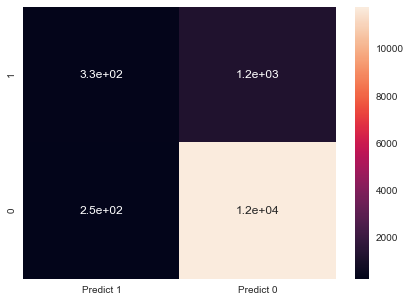

In [32]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Creating decision tree model:

In [33]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
print("Train: %.2f" % model_entropy.score(X_train, y_train))  
print("Test: %.2f" % model_entropy.score(X_test, y_test))

Train: 1.00
Test: 0.88


In [34]:
data_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
data_pruned.fit(X_train, y_train)
print("Train: %.2f" % data_pruned.score(X_train, y_train))  
print("Test: %.2f" % data_pruned.score(X_test, y_test))

Train: 0.89
Test: 0.89


In [35]:
preds_train = data_pruned.predict(X_train)
preds_test = data_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [36]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11791,222
1,1272,279


#### Creating ensemble models:

In [37]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = tempResultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Adaboost,0.890961


ROCAUC(ax=<AxesSubplot:>, binary=None,
       estimator=AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=22))

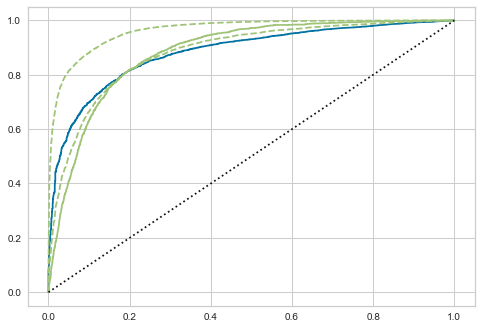

In [38]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [39]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
tempResultsDf1 = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf1 = tempResultsDf1[['Method', 'accuracy']]
resultsDf1

,Method,accuracy
0,Bagging,0.903421


ROCAUC(ax=<AxesSubplot:>, binary=None,
       estimator=BaggingClassifier(max_samples=0.7, n_estimators=50,
                                   oob_score=True, random_state=22))

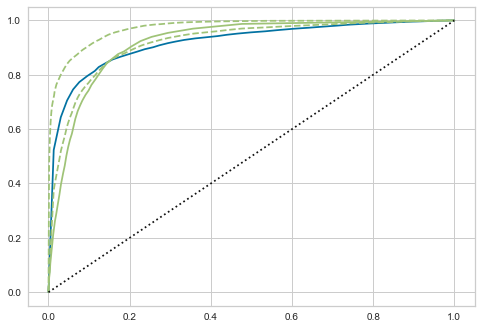

In [40]:
roc1 = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc1.fit(X_train, y_train)
roc1.score(X_test, y_test)
roc1